In [1]:
import time
import requests
import pinecone
from dotenv import load_dotenv
from bs4 import BeautifulSoup
import os


from typing import Annotated, Literal, Sequence, Union, TypedDict
from pinecone import Pinecone

from langchain_core.prompts import (
    ChatPromptTemplate,
    MessagesPlaceholder,
    PromptTemplate
)
from langchain_core.messages import (
    SystemMessage,
    HumanMessage,
    AIMessage,
    ToolMessage,
    BaseMessage
)
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables import RunnableWithMessageHistory
from langchain_core.output_parsers import StrOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.tools import tool


from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

from langchain.chains import (
    create_history_aware_retriever,
    create_retrieval_chain
)
from langchain.chains.combine_documents import create_stuff_documents_chain

from langchain.tools.retriever import create_retriever_tool

from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_groq import ChatGroq
from langchain_pinecone import PineconeVectorStore

from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain import hub

C:\Users\ankus\anaconda3\envs\genai_env\lib\site-packages\IPython\core\interactiveshell.py:3579: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
load_dotenv()
pine_cone = os.getenv('pine_cone')
groq = os.getenv('groq')
hugging_face = os.getenv("hugging_face")

In [3]:
embedding = HuggingFaceBgeEmbeddings(model_name="BAAI/bge-base-en-v1.5",
                                    model_kwargs={"token" : hugging_face})

C:\Users\ankus\AppData\Local\Temp\ipykernel_3736\603423264.py:1: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceBgeEmbeddings(model_name="BAAI/bge-base-en-v1.5",


In [4]:
llm = ChatGroq(model = "llama-3.3-70b-versatile" , api_key=groq , temperature=0.5)

In [5]:
llm.invoke("hi")

AIMessage(content="It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 36, 'total_tokens': 59, 'completion_time': 0.043352618, 'prompt_time': 0.001744048, 'queue_time': 0.057998501, 'total_time': 0.045096666}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_6507bcfb6f', 'finish_reason': 'stop', 'logprobs': None}, id='run--76aaa389-cb52-4427-867a-32a5dc8a708e-0', usage_metadata={'input_tokens': 36, 'output_tokens': 23, 'total_tokens': 59})

In [6]:
index = "teacher"
pc = Pinecone(api_key = "pcsk_72ZQ1q_4eymSon7uwWDz2hkeWDScbcPBrC2ANEkU5CjTNgy1d3xDAUFFTsYwdYx6CcEpnE")

In [7]:
index = pc.Index(index , host=os.getenv("host_bg"))

In [8]:
vector = PineconeVectorStore(index=index,
    embedding=embedding,
    text_key="page_content")

In [9]:
retriever = vector.as_retriever()

In [10]:
question = "What is MVP?"
relevant_docs = retriever.get_relevant_documents(question)
for doc in relevant_docs:
    print(doc.page_content)

C:\Users\ankus\AppData\Local\Temp\ipykernel_3736\699289641.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  relevant_docs = retriever.get_relevant_documents(question)


se of a small business, in which it is routine to see the CEO, founder, president, and owner serving customers directly, one at a time. In a concierge MVP, this personalized service is not the product but a learning activity designed to test the leap-of-faith assumptions in the companys growth model. In fact, a common outcome of a concierge MVP is to invalidate the companys proposed growth model, making it clear that a dierent approach is needed. This can happen even if the initial MVP is protable for the company. Without a formal growth model, many companies get caught in the trap of being satised with a small protable business when a pivot change in course or strategy might lead to more signicant growth. The only way to know is to have tested the growth model systematically with real customers. PAY NO ATTENTION TO THE EIGHT PEOPLE BEHIND THE CURTAIN Meet Max Ventilla and Damon Horowitz, technologists with a vision to build a new type of search software designed to answer the kinds of

In [11]:
from langchain.tools.retriever import create_retriever_tool
from groq import Groq
retriever_tool = create_retriever_tool(retriever ,
                                       "startup_coach_retriever",
                                       "Search and return helpful information about startup coaching, pitching to VCs, and building MVPs. Use this only when the query is about startup building, fundraising, or entrepreneurship.")

                                       
                                    

In [12]:
from selenium import webdriver
URLS = ["https://devfolio.co/hackathons",]
def get_page_text(url: str) -> str:
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(5)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    driver.quit()

    return ' '.join(
        tag.get_text(strip=True)
        for tag in soup.find_all(['p', 'li', 'h1', 'h2', 'h3'])
    )

In [13]:
from langchain.tools import tool
@tool
def ask_question(question: str) -> str:
    """ this tool provide all the information about the hackathons like how to apply what are theam of the hackathon how can apply.
    """
    combined_content = ""
    for url in URLS:
        print(f"Scraping: {url}")
        try:
            text = get_page_text(url)
            combined_content += text + "\n\n"
        except Exception as e:
            print(f"Error scraping {url}: {e}")

    context = combined_content[:12000]

    prompt = f"""You are an assistant that answers questions using only the following website content.
    provide information in this formare 
    hackathone name 
    eligiblity critria
    and also how to apply for the hackathon
Website Content:
{context}

Question:
{question}

Answer:"""

    client = Groq(api_key=groq)
    response = client.chat.completions.create(
        model="llama3-8b-8192",
        messages=[
            {"role": "system", "content": "Answer only using the provided website content."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.2,
    )

    return response.choices[0].message.content

In [14]:
tools = [ask_question ,retriever_tool ]

In [15]:
retrieve=ToolNode(tools)

In [16]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [17]:
def ai_assistant(state: AgentState):
    messages = state["messages"]
    question = messages[-1].content  

    llm_with_tool = llm.bind_tools(tools)

    prompt = PromptTemplate(
        template="""You are a helpful assistant.
If the message is a greeting like 'hi', 'hello', or 'hey', just greet back nicely.
If the question is about startups/business, call 'retriever_tool'.
If it's about hackathons, call 'ask_question'.
Otherwise say "Sorry, I don't know the answer to that."
If the user tells you their name, email , about there atsrtups, respond politely and remember it.
take examples is user did'nt understand and your answer should be in 0 to 500 words according to questions.

Question: {question}""",
        input_variables=["question"]
    )
    chain = prompt | llm_with_tool
    response = chain.invoke({"question": question})
    return {"messages": [response]}


In [18]:
from langchain_core.pydantic_v1 import BaseModel, Field
class grade(BaseModel):
    binary_score:str=Field(description="Relevance score 'yes' or 'no'")

In [19]:
def grade_documents(state:AgentState)->Literal["Output_Generator", "Query_Rewriter"]:
    llm_with_structure_op=llm.with_structured_output(grade)
    
    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
    chain = prompt | llm_with_structure_op
    
    messages = state["messages"]
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content
    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generator" 
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewriter" 

In [20]:
def generate(state:AgentState):
    print("---GENERATE---")
    messages = state["messages"]

    question = messages[0].content
    
    last_message = messages[-1]
    docs = last_message.content
    
    prompt = PromptTemplate(
    template="You are a helpful assistant. Use the following context to answer the user's question.\n\nContext:\n{context}\n\nQuestion: {question}",
    input_variables=["context", "question"]
)
    
    rag_chain = prompt | llm

    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [21]:
from langchain_core.messages import  HumanMessage
def rewrite(state:AgentState):
    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content
    
    message = [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]
    response = llm.invoke(message)
    return {"messages": [response]}

In [22]:
workflow=StateGraph(AgentState)
workflow.add_node("My_Ai_Assistant",ai_assistant)
workflow.add_node("Vector_Retriever", retrieve) 
workflow.add_node("Output_Generator", generate)
workflow.add_node("Query_Rewriter", rewrite)

In [23]:
workflow.add_edge(START,"My_Ai_Assistant")

In [24]:
workflow.add_conditional_edges("My_Ai_Assistant",
                               
                            tools_condition,
                            {"tools": "Vector_Retriever",
                                END: END,})

In [25]:
workflow.add_conditional_edges("Vector_Retriever",
                            grade_documents,
                            {"generator": "Output_Generator",
                            "rewriter": "Query_Rewriter",
                            }
                            )

In [26]:
workflow.add_edge("Output_Generator", END)

In [27]:
workflow.add_edge("Query_Rewriter", "My_Ai_Assistant")

In [28]:
app = workflow.compile()

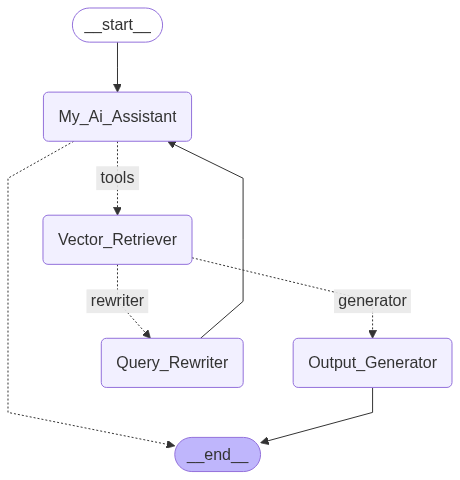

In [29]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [31]:
result = app.invoke({
    "messages": [HumanMessage(content="is any hackthon live?")]
})
print(result)

Scraping: https://devfolio.co/hackathons
---DECISION: DOCS RELEVANT---
---GENERATE---
{'messages': [HumanMessage(content='is any hackthon live?', additional_kwargs={}, response_metadata={}, id='a3b375ea-40a6-4981-ad5d-07d19bcc122b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '07d7abvd2', 'function': {'arguments': '{"question":"is any hackthon live"}', 'name': 'ask_question'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 502, 'total_tokens': 521, 'completion_time': 0.058144907, 'prompt_time': 0.032285397, 'queue_time': 0.05757976, 'total_time': 0.090430304}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9a8b91ba77', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f906d003-72d9-4c14-863b-6a31b268ad02-0', tool_calls=[{'name': 'ask_question', 'args': {'question': 'is any hackthon live'}, 'id': '07d7abvd2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 502, 'output_tokens': 1

In [32]:
print(app.get_graph().print_ascii())

                                  +-----------+                          
                                  | __start__ |                          
                                  +-----------+                          
                                        *                                
                                        *                                
                                        *                                
                               +-----------------+                       
                               | My_Ai_Assistant |                       
                            ...+-----------------+...                    
                       .....            *            .....               
                  .....                 *                 .....          
               ...                      *                      .....     
+------------------+                    *                           ...  
| Vector_Retriever |                  

In [44]:
from langchain_core.messages import HumanMessage, AIMessage

print("Hi! I am Assistant version 1.0. I'm here to help you regarding trips or hackathons.")

while True:
    user_input = input("You: ").strip()

    if user_input.lower() == "exit":
        print("Assistant: Thank you for using the Assistant. Goodbye!")
        break

    try:
        result = app.invoke({
            "messages": [HumanMessage(content=user_input)]
        })

        last_message = result["messages"][-1]

        if isinstance(last_message, AIMessage) and last_message.content:
            print("Assistant:", last_message.content)
        else:
            print("Assistant: I'm processing your request...")

    except Exception as e:
        print(f"Assistant: Sorry, I encountered an error: {str(e)}")


Hi! I am Assistant version 1.0. I'm here to help you regarding trips or hackathons.


You:  hii


Assistant: Hello! It's nice to meet you. Is there something I can help you with or would you like to chat?


You:  how i grow my startup


---DECISION: DOCS RELEVANT---
---GENERATE---
Assistant: To grow your startup, you can consider two main approaches: horizontal growth and vertical growth. 

Horizontal growth involves expanding your business by creating different products or services to appeal to a wider range of customers. This can help you reach new markets and increase your revenue.

Vertical growth, on the other hand, involves deepening your engagement with your existing customers by offering more levels of service or creating more value for them. This can help you increase customer loyalty and retention, and ultimately drive more revenue.

Some key points to keep in mind when growing your startup include:

1. **Increasing income in an existing business is usually easier than starting from scratch**: You've already established a foundation, so building on that can be more straightforward.
2. **Making careful choices can help you grow without dramatically increasing your workload**: Be strategic about where you focu

You:  ok thankyu


Assistant: You're welcome. Is there anything else I can help you with?


You:  exit


Assistant: Thank you for using the Assistant. Goodbye!
